<a href="https://colab.research.google.com/github/theadamsabra/Audio-Source-Separation-Undergraduate-Thesis/blob/master/Full%20Procedure.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# AS OF NOW, DO NOT RUN THE CELLS AND VIEW THE CACHED RESULTS
THIS ISSUE WILL BE SOLVED SOON.

In [1]:
!pip install soundfile
!pip install pydub

## 1: Exploratory Data Analysis

### 1.1: Preliminary Data Exploration

In [2]:
import os
import librosa
import soundfile as sf
import numpy as np
import scipy
import math
import tqdm
from pydub import AudioSegment
from matplotlib import pyplot as plt
from google.colab import drive

In [3]:
# Mount Google Drive account and access folder
# Might not work on different accounts
drive.mount('/content/drive')
path = '/content/drive/My Drive/Thesis/Miles Davis - Kind of Blue'
directory = os.listdir(path)
files = [f for f in directory if os.path.isfile(os.path.join(path, f))]

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
# We'll use one song for now.
test_file = files[3]
song_path = path + '/' + test_file
data, samplerate = sf.read(song_path)
time = np.arange(0, data.shape[0]) / samplerate   

In [9]:
print('Shape of Array:', data.shape,
      '\n Sample Rate:', samplerate,
      '\n Length of Song in Seconds:', np.max(time),
      '\n Length of Song in Minutes (rounded down):', math.floor(np.max(time) / 60))

Shape of Array: (66518089, 8) 
 Sample Rate: 96000 
 Length of Song in Seconds: 692.89675 
 Length of Song in Minutes (rounded down): 11


The objective of this project is to locate the 4 instruments (sources) from the 8 channel recordings. Below is a snippet of $\approx$7 seconds of the song "All Blues." You can see the recordings from all 8 channels.


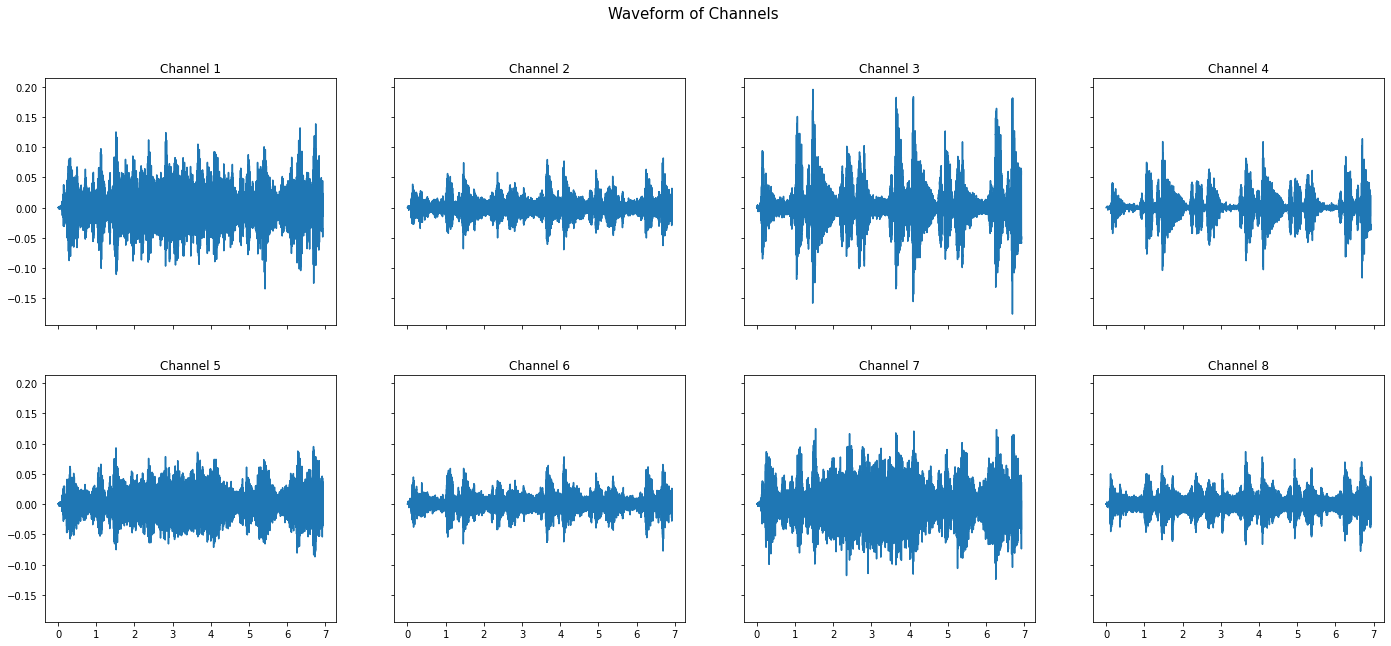

In [6]:
# CHANGE FUNCTION FOR ONLY DATA AS THE PARAMETER
# REMOVE NUM_CHANNELS PARAMETER AND TEST FOR NUM CHANNELS BEING EVEN OR ODD
# ADD FIGSIZE PARAMETER BUT INITIALIZE AND LEAVE IT
samp_time = time[:int(time.size/100)]
samp_data = data[:int(time.size/100), :]

def mchan_wavform(data:np.array, time, num_chan = 8):
  '''
  Call function to visualize the waveform of all channels.

  Parameters
  ---------- 
  - data: ndarray of size (n_samples, num_chan)
    2D array of the multichannel song to visualize.
  
  -- Returns --
  - matplotlib figure
    Waveform of the various channels.
  '''

  fig, ax = plt.subplots(2, int(num_chan / 2), figsize = (24,10), sharex = True, 
                         sharey = True)
  for i, axes in enumerate(ax.flatten()):
    axes.plot(samp_time, samp_data[:, i])
    axes.set(title = 'Channel ' + str(i + 1))
  fig.suptitle('Waveform of Channels', fontsize = 15)
  plt.show()

mchan_wavform(samp_data, samp_time)

### 1.2: Moving to the Frequency Domain

#### 1.2.1: Fast Fourier Transform

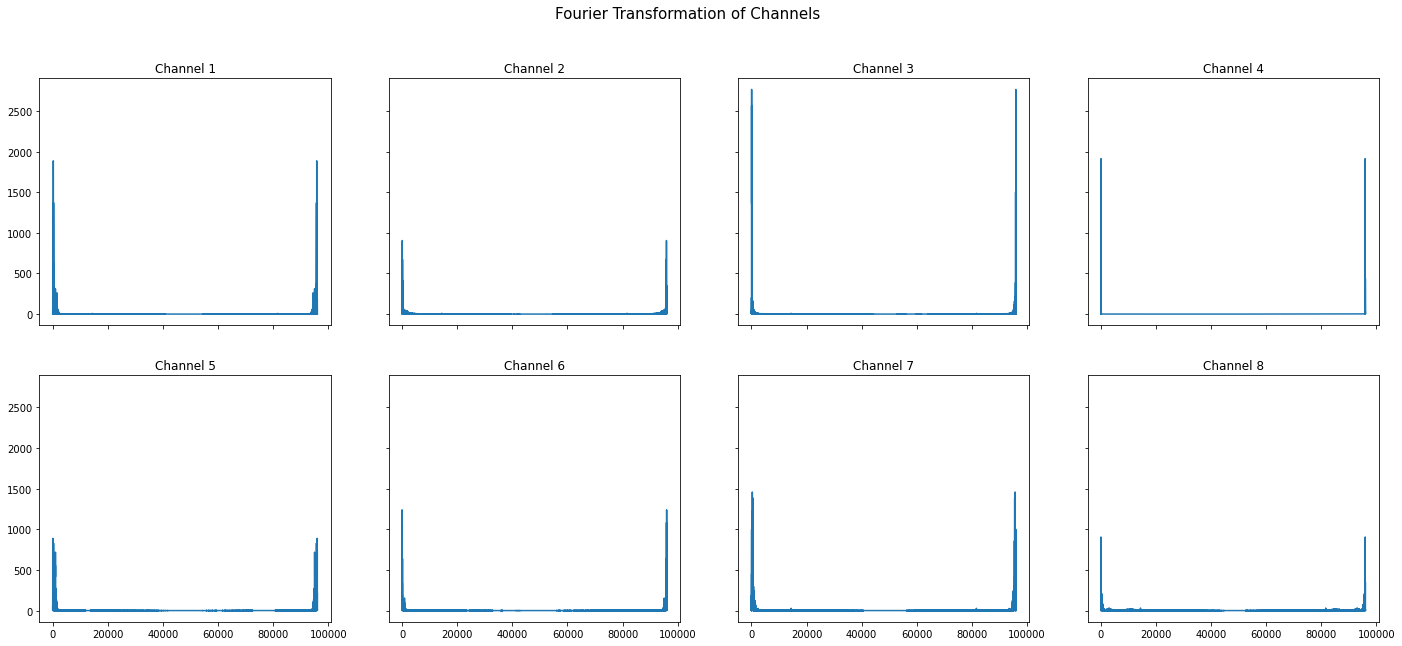

In [7]:
# REMOVE NUM_CHANNELS PARAMETER AND TEST FOR NUM CHANNELS BEING EVEN OR ODD
# ADD PARAMETER CALLED LEFT TYPE BOOLEAN
# ADD FIGSIZE PARAMETER BUT INITIALIZE AND LEAVE IT
def mchan_fft(data, samplerate, symmetric = False):
  '''
  Call function to visualize Fourier transformation of all channels.

  Parameters
  ----------
  - data: array
      2D array of the multichannel song to visualize. 

  - samplerate: int
      Sampling rate of song. Will usually be given when reading in the song.
  
  - symmetric: boolean (default set to False)
      Determine whether or not to visualize the symmetric property of the Fourier
    Transformation. Will be initialized to False as it is dificult to see the
    details when viewing both extremities.
    
  Returns
  -------
  - matplotlib.figure
      Fourier transformation of the various channels.
  '''
  fig, ax = plt.subplots(2, int(num_channels / 2), figsize = (24,10), 
                         sharex = True, sharey = True)
  for i, axes in enumerate(ax.flatten()):
    fft = np.fft.fft(data[:, i])
    mag = np.abs(fft)
    freq = np.linspace(0, samplerate, len(mag))
    axes.plot(freq, mag)
    axes.set(title = 'Channel ' + str(i + 1))
  fig.suptitle('Fourier Transformation of Channels', fontsize = 15)
  plt.show()

mchan_fft(samp_data, samplerate)

The symmetrical form of the FFT can be seen in the graphs above. We will look at the left power of the channels.

#### 1.2.2: Left Power

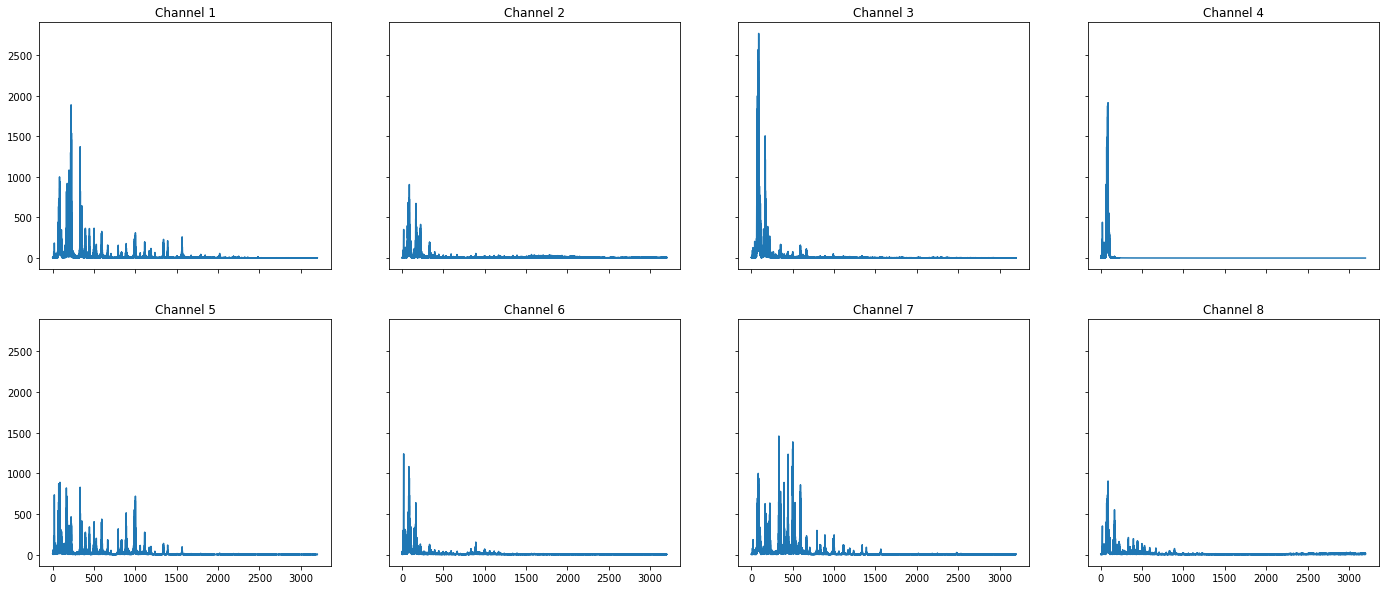

In [17]:
def mchan_left_fft(data, samplerate, num_channels = 8):
  fig, ax = plt.subplots(2, int(num_channels / 2), figsize = (24,10), 
                         sharex = True, sharey = True)
  for i, axes in enumerate(ax.flatten()):
    fft = np.fft.fft(data[:, i])
    mag = np.abs(fft)
    freq = np.linspace(0, samplerate, len(mag))
    left_freq = freq[:int(len(freq)/30)]
    left_mag = mag[:int(len(mag)/30)]
    axes.plot(left_freq, left_mag)
    axes.set(title = 'Channel ' + str(i + 1))
  plt.show()

mchan_left_fft(samp_data, samplerate)

#### 1.2.4: Mel Frequency Cepstrum Coefficient

In [ ]:
def mchan_mfcc():
  pass

mchan_mfcc()

There is a lot of potential for a GUI implementation of above.

## 2: Data Processing

### 2.1: Audio Sampling

1

In [ ]:
# Slice audio into 30 second snippets
# Use commented class below as reference to make splitter

# class SplitWavAudioMubin():
#     def __init__(self, folder, filename):
#         self.folder = folder
#         self.filename = filename
#         self.filepath = folder + '\\' + filename
        
#         self.audio = AudioSegment.from_wav(self.filepath)
    
#     def get_duration(self):
#         return self.audio.duration_seconds
    
#     def single_split(self, from_min, to_min, split_filename):
#         t1 = from_min * 60 * 1000
#         t2 = to_min * 60 * 1000
#         split_audio = self.audio[t1:t2]
#         split_audio.export(self.folder + '\\' + split_filename, format="wav")
        
#     def multiple_split(self, min_per_split):
#         total_mins = math.ceil(self.get_duration() / 60)
#         for i in range(0, total_mins, min_per_split):
#             split_fn = str(i) + '_' + self.filename
#             self.single_split(i, i+min_per_split, split_fn)
#             print(str(i) + ' Done')
#             if i == total_mins - min_per_split:
#                 print('All splited successfully')
 
 def split_audio(folder_path, min_per_split = 0.5):
   '''
   Split up all audio files in folder into determined time periods.

   Parameters
   ----------
   folder: str
      Path to folder with audio files.
    min_per_split: num
   '''

### 2.2: Sample Processing

In [ ]:
# Take snippets and process into train and test set
def sample_process(data_array):
  pass
  # Return x_train, x_test, y_train, y_test

## 3: Building the LSTM